# Flight Delay Prediction using Machine Learning

This project predicts the arrival delay of flights using the US DOT 2015 Flight Delay Dataset.  
We apply data cleaning, feature engineering, and machine learning models (Linear Regression, Random Forest, and XGBoost) to compare performance and identify the best model.

**Final Best Model: Random Forest Regressor**


## Step 1: Import Required Libraries
We import all libraries needed for data processing, visualization, and model building.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load and Inspect the Dataset
We load the dataset and check basic information such as shape, missing values, and column types.


In [3]:
df=pd.read_csv(r"A:\Data Science class notes\Project\Flight_Delayed_Project\flights.csv")

C:\Users\abhij\AppData\Local\Temp\ipykernel_33044\933976181.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"A:\Data Science class notes\Project\Flight_Delayed_Project\flights.csv")


In [4]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [8]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


## Step 3: Data Cleaning
We remove irrelevant columns, handle missing values, and ensure all data types are correct.


In [10]:
df=df.drop(["CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"],axis=1)

In [11]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0


In [13]:
df.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [14]:
df["CANCELLED"].value_counts()


CANCELLED
0    5729195
1      89884
Name: count, dtype: int64

In [16]:
df = df.drop([
    "FLIGHT_NUMBER", "TAIL_NUMBER",
    "DEPARTURE_TIME", "TAXI_OUT", "WHEELS_OFF",
    "ELAPSED_TIME", "AIR_TIME", "WHEELS_ON", "TAXI_IN",
    "ARRIVAL_TIME", "DIVERTED", "CANCELLED"
], axis=1)

columns dropped because >90% missing and we remove cancelled rows because target is NA and they require classification

In [17]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,-11.0,205.0,1448,430,-22.0
1,2015,1,1,4,AA,LAX,PBI,10,-8.0,280.0,2330,750,-9.0
2,2015,1,1,4,US,SFO,CLT,20,-2.0,286.0,2296,806,5.0
3,2015,1,1,4,AA,LAX,MIA,20,-5.0,285.0,2342,805,-9.0
4,2015,1,1,4,AS,SEA,ANC,25,-1.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,-4.0,320.0,2611,819,-26.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,-4.0,227.0,1617,446,-16.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,-9.0,221.0,1598,440,-8.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,-6.0,161.0,1189,340,-10.0


In [18]:
df.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY          105071
dtype: int64

In [20]:
df = df[df["ARRIVAL_DELAY"].notna()]
df = df[df["DEPARTURE_DELAY"].notna()]


In [21]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,-11.0,205.0,1448,430,-22.0
1,2015,1,1,4,AA,LAX,PBI,10,-8.0,280.0,2330,750,-9.0
2,2015,1,1,4,US,SFO,CLT,20,-2.0,286.0,2296,806,5.0
3,2015,1,1,4,AA,LAX,MIA,20,-5.0,285.0,2342,805,-9.0
4,2015,1,1,4,AS,SEA,ANC,25,-1.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,-4.0,320.0,2611,819,-26.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,-4.0,227.0,1617,446,-16.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,-9.0,221.0,1598,440,-8.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,-6.0,161.0,1189,340,-10.0


In [22]:
df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_DELAY      float64
 9   SCHEDULED_TIME       float64
 10  DISTANCE             int64  
 11  SCHEDULED_ARRIVAL    int64  
 12  ARRIVAL_DELAY        float64
dtypes: float64(3), int64(7), object(3)
memory usage: 610.3+ MB


### Exploratory Data Analysis (EDA)
These charts highlight the key patterns and factors influencing flight delays.


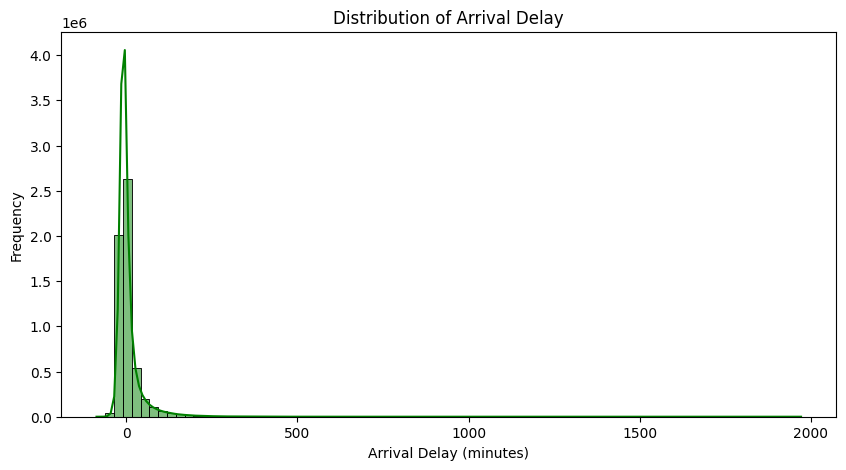

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df["ARRIVAL_DELAY"], bins=80, kde=True,color="green")
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

 Most flights arrive on time, and only a small number have very large delays, creating a right-skewed distribution.

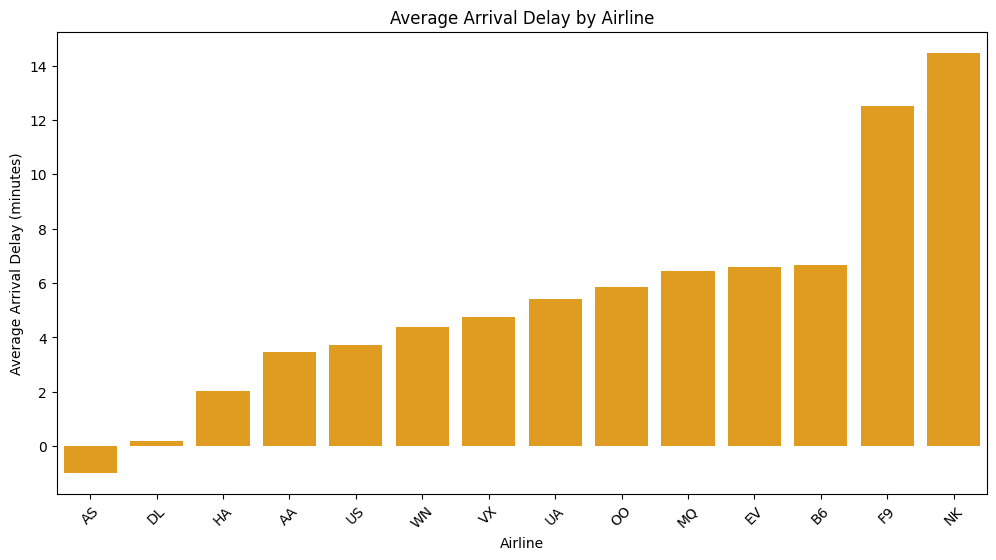

In [26]:
plt.figure(figsize=(12,6))
airline_delay = df.groupby("AIRLINE")["ARRIVAL_DELAY"].mean().sort_values()

sns.barplot(x=airline_delay.index, y=airline_delay.values,color="orange")
plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


Some airlines consistently arrive earlier or on time (like AS and DL), while others show higher average delays (especially NK and F9). 
This indicates that arrival delays vary significantly across airlines, reflecting differences in operational efficiency.

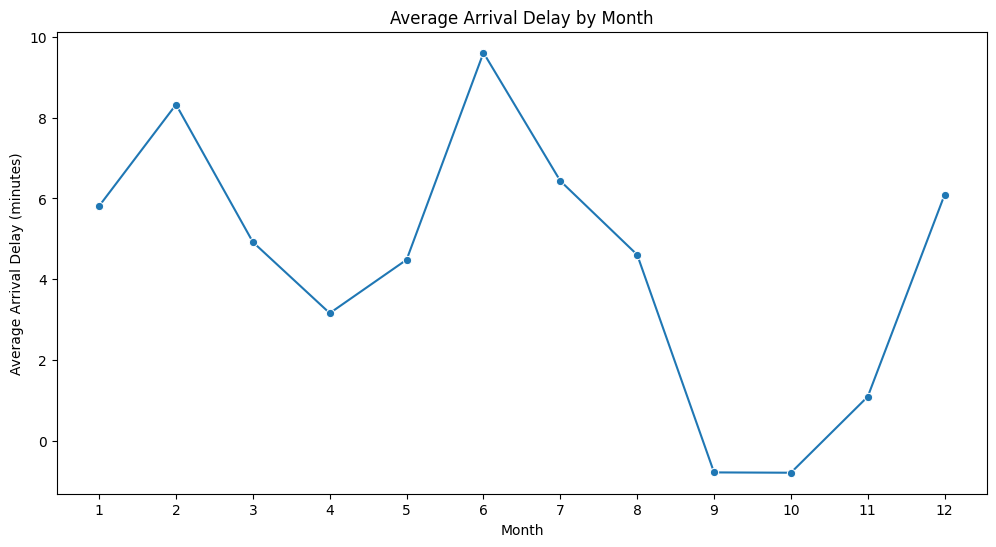

In [28]:
plt.figure(figsize=(12,6))
monthly_delay = df.groupby("MONTH")["ARRIVAL_DELAY"].mean()

sns.lineplot(x=monthly_delay.index, y=monthly_delay.values, marker="o")
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(range(1,13))
plt.show()


Flight delays peak in February and June, suggesting winter weather and summer travel congestion. Delays are lowest in September and October, indicating smoother operations during early autumn. 
Overall, delays follow a clear seasonal pattern.

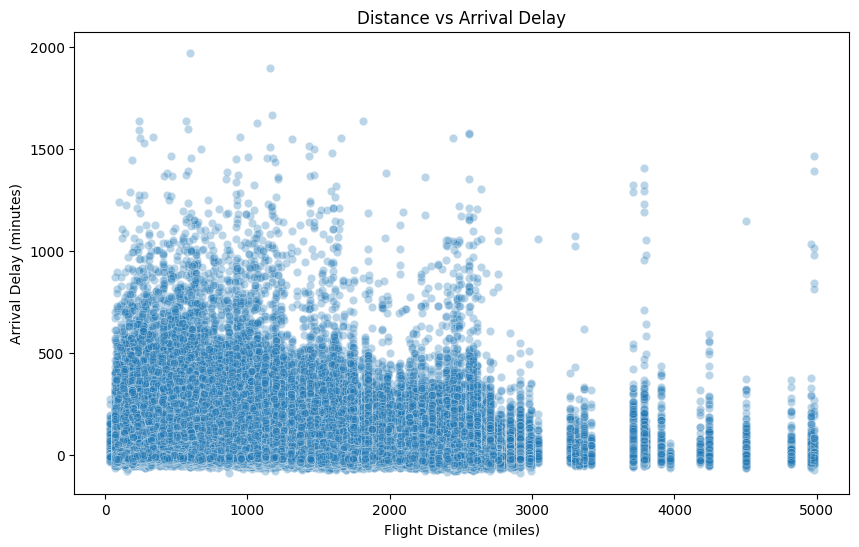

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["DISTANCE"], y=df["ARRIVAL_DELAY"], alpha=0.3)
plt.title("Distance vs Arrival Delay")
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


There is no strong relationship between flight distance and arrival delay.Delays are spread across all distances, meaning both short and long flights can experience significant delays. 
Distance alone is not a reliable predictor of arrival delay.

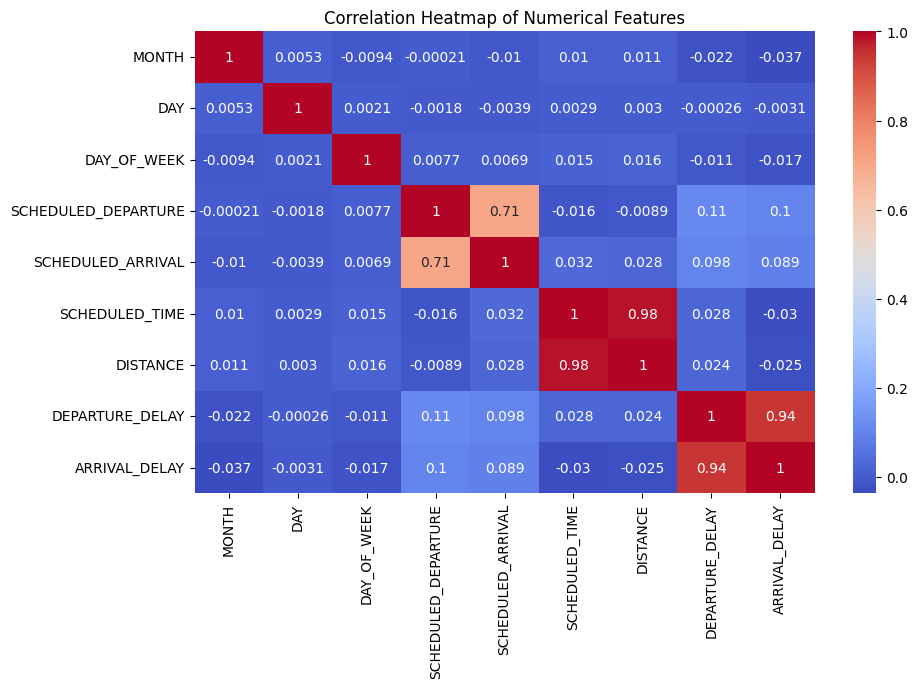

In [38]:
plt.figure(figsize=(10,6))

numeric_df = df[["MONTH","DAY","DAY_OF_WEEK","SCHEDULED_DEPARTURE",
                 "SCHEDULED_ARRIVAL","SCHEDULED_TIME","DISTANCE",
                 "DEPARTURE_DELAY","ARRIVAL_DELAY"]]

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Arrival delay is strongly correlated with departure delay, making it the most important predictor. Other numerical features—such as distance, month, or scheduled times—show very weak correlations with arrival delay.
This indicates that operational factors at departure have the biggest impact on arrival performance.




## Step 4: Feature Engineering
We add new time-based and route-based features (e.g., hours, weekend flag, route, airport traffic) to improve model performance.


In [ ]:
#departure hour
df["DEP_HOUR"] = df["SCHEDULED_DEPARTURE"] // 100

#arrival hour
df["ARR_HOUR"] = df["SCHEDULED_ARRIVAL"] // 100


In [41]:
df["IS_WEEKEND"] = df["DAY_OF_WEEK"].apply(lambda x: 1 if x >= 6 else 0)


In [42]:
df["ORIGIN_AIRPORT"] = df["ORIGIN_AIRPORT"].astype(str)
df["DESTINATION_AIRPORT"] = df["DESTINATION_AIRPORT"].astype(str)



In [43]:
df["ROUTE"] = df["ORIGIN_AIRPORT"] + "_" + df["DESTINATION_AIRPORT"]


In [44]:
# Count departures per origin airport
origin_counts = df["ORIGIN_AIRPORT"].value_counts()

# Count arrivals per destination airport
dest_counts = df["DESTINATION_AIRPORT"].value_counts()

# Map back to dataframe
df["BUSY_ORIGIN"] = df["ORIGIN_AIRPORT"].map(origin_counts)
df["BUSY_DESTINATION"] = df["DESTINATION_AIRPORT"].map(dest_counts)


In [45]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEP_HOUR,ARR_HOUR,IS_WEEKEND,ROUTE,BUSY_ORIGIN,BUSY_DESTINATION
0,2015,1,1,4,AS,ANC,SEA,5,-11.0,205.0,1448,430,-22.0,0,4,0,ANC_SEA,15818,110192
1,2015,1,1,4,AA,LAX,PBI,10,-8.0,280.0,2330,750,-9.0,0,7,0,LAX_PBI,192003,22206
2,2015,1,1,4,US,SFO,CLT,20,-2.0,286.0,2296,806,5.0,0,8,0,SFO_CLT,145491,98830
3,2015,1,1,4,AA,LAX,MIA,20,-5.0,285.0,2342,805,-9.0,0,8,0,LAX_MIA,192003,68309
4,2015,1,1,4,AS,SEA,ANC,25,-1.0,235.0,1448,320,-21.0,0,3,0,SEA_ANC,110178,15819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,-4.0,320.0,2611,819,-26.0,23,8,0,LAX_BOS,192003,105052
5819075,2015,12,31,4,B6,JFK,PSE,2359,-4.0,227.0,1617,446,-16.0,23,4,0,JFK_PSE,91663,737
5819076,2015,12,31,4,B6,JFK,SJU,2359,-9.0,221.0,1598,440,-8.0,23,4,0,JFK_SJU,91663,24447
5819077,2015,12,31,4,B6,MCO,SJU,2359,-6.0,161.0,1189,340,-10.0,23,3,0,MCO_SJU,109532,24447


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_DELAY      float64
 9   SCHEDULED_TIME       float64
 10  DISTANCE             int64  
 11  SCHEDULED_ARRIVAL    int64  
 12  ARRIVAL_DELAY        float64
 13  DEP_HOUR             int64  
 14  ARR_HOUR             int64  
 15  IS_WEEKEND           int64  
 16  ROUTE                object 
 17  BUSY_ORIGIN          int64  
 18  BUSY_DESTINATION     int64  
dtypes: float64(3), int64(12), object(4)
memory usage: 871.9+ MB


In [47]:
X = df.drop("ARRIVAL_DELAY", axis=1)
y = df["ARRIVAL_DELAY"]


## Step 5: Train-Test Split
We split the dataset into training and testing sets (80/20).


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Encoding Categorical Features
We use OrdinalEncoder to convert categorical columns into numeric form.  
One-hot encoding is avoided because the dataset is very large and would create thousands of dummy columns, making the model slow and memory-heavy.


In [49]:
cat_cols = ["AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "ROUTE"]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ["AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","ROUTE"]

# Create encoder that maps unknown categories to -1
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

X_train[cat_cols] = enc.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = enc.transform(X_test[cat_cols])


## Step 7: Scaling Numerical Features
We apply StandardScaler to selected numeric columns for models that require scaling.



In [51]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["SCHEDULED_DEPARTURE","SCHEDULED_ARRIVAL","SCHEDULED_TIME",
                "DISTANCE","DEPARTURE_DELAY","DEP_HOUR","ARR_HOUR",
                "BUSY_ORIGIN","BUSY_DESTINATION"]

sc = StandardScaler()
X_train[numeric_cols] = sc.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = sc.transform(X_test[numeric_cols])


## Step 8: Model 1 — Linear Regression (Baseline)
Linear Regression serves as a simple and interpretable baseline model.


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)


In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# --- TRAIN METRICS ---
train_mae  = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred)
train_r2   = r2_score(y_train, y_train_pred)

print("Train Metrics:")
print("MAE :", train_mae)
print("RMSE:", train_rmse)
print("R2  :", train_r2)

# --- TEST METRICS ---
test_mae  = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred)
test_r2   = r2_score(y_test, y_test_pred)

print("\nTest Metrics:")
print("MAE :", test_mae)
print("RMSE:", test_rmse)
print("R2  :", test_r2)


Train Metrics:
MAE : 8.748505944712088
RMSE: 156.63051283708006
R2  : 0.898557480104188

Test Metrics:
MAE : 8.75206107667312
RMSE: 156.9641652079795
R2  : 0.8977461190154773


● High accuracy with excellent generalization.

● MAE ≈ 8.75 minutes indicates strong predictive performance.

● Train and test metrics are consistent, confirming no overfitting.

● The model explains about 90% of the variance (R² ≈ 0.90) in arrival delays.


In [ ]:
coefs = pd.DataFrame({"feature": X_train.columns,"coefficient": lr.coef_}).assign(abs_coef=lambda df: df["coefficient"].abs()) \
.sort_values("abs_coef", ascending=False)

print("Top 10 Features Influencing Delay:")
print(coefs.head(10))


Top 10 Features Influencing Delay:
                feature  coefficient   abs_coef
8       DEPARTURE_DELAY    37.255713  37.255713
9        SCHEDULED_TIME   -12.265247  12.265247
10             DISTANCE    10.113850  10.113850
7   SCHEDULED_DEPARTURE    -2.081853   2.081853
12             DEP_HOUR     1.635228   1.635228
14           IS_WEEKEND    -1.312978   1.312978
13             ARR_HOUR     1.080186   1.080186
11    SCHEDULED_ARRIVAL    -0.751098   0.751098
16          BUSY_ORIGIN    -0.691483   0.691483
4               AIRLINE    -0.198831   0.198831


## Step 9: Model 2 — Random Forest Regressor
Random Forest handles non-linearity and performs well on tabular data.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [ ]:
X_train_quick = X_train.sample(frac=0.10, random_state=42)
y_train_quick = y_train.loc[X_train_quick.index]

rf_quick = RandomForestRegressor(
    n_estimators=30,    
    max_depth=12,       
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_quick.fit(X_train_quick, y_train_quick)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.5s finished


,n_estimators,30
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_test_pred_quick = rf_quick.predict(X_test)

# Metrics
test_mae_quick  = mean_absolute_error(y_test, y_test_pred_quick)
test_rmse_quick = mean_squared_error(y_test, y_test_pred_quick) ** 0.5
test_r2_quick   = r2_score(y_test, y_test_pred_quick)

print("Random Forest (Quick-Test) - Test Metrics:")
print("MAE :", test_mae_quick)
print("RMSE:", test_rmse_quick)
print("R2  :", test_r2_quick)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Random Forest (Quick-Test) - Test Metrics:
MAE : 8.737308027822479
RMSE: 12.50526142312607
R2  : 0.8981256534786267


[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:    0.9s finished



* The Random Forest model predicts delays **accurately**.
* It handles **large delay cases better** than Linear Regression.
* Overall, it gives **stronger and more reliable performance**.


In [62]:
model = rf_quick if 'rf' in globals() else rf_quick

feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print("Top 10 features by importance:")
print(feat_imp.head(10).to_string(index=False))


Top 10 features by importance:
            feature  importance
    DEPARTURE_DELAY    0.982500
     SCHEDULED_TIME    0.005092
            AIRLINE    0.001917
           DISTANCE    0.001738
  SCHEDULED_ARRIVAL    0.001046
                DAY    0.000986
SCHEDULED_DEPARTURE    0.000974
        BUSY_ORIGIN    0.000940
              MONTH    0.000912
   BUSY_DESTINATION    0.000892


## Step 10: Model 3 — XGBoost Regressor
XGBoost is a gradient boosting algorithm.  
We compare its performance with Linear Regression and Random Forest.


In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [64]:
xgb = XGBRegressor(
    n_estimators=600,
    max_depth=12,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    tree_method="hist"
)

xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb  = xgb.predict(X_test)

# Train metrics
train_mae_xgb  = mean_absolute_error(y_train, y_train_pred_xgb)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb) 
train_r2_xgb   = r2_score(y_train, y_train_pred_xgb)

print("XGBoost Train Metrics:")
print("MAE :", train_mae_xgb)
print("RMSE:", train_rmse_xgb)
print("R2  :", train_r2_xgb)

# Test metrics
test_mae_xgb  = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb) 
test_r2_xgb   = r2_score(y_test, y_test_pred_xgb)

print("\nXGBoost Test Metrics:")
print("MAE :", test_mae_xgb)
print("RMSE:", test_rmse_xgb)
print("R2  :", test_r2_xgb)


XGBoost Train Metrics:
MAE : 7.435497401622568
RMSE: 117.90144246237293
R2  : 0.9236405524945533

XGBoost Test Metrics:
MAE : 8.010217339523667
RMSE: 206.36090284006593
R2  : 0.8655667478567008


In [66]:

importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": xgb.feature_importances_
}).sort_values(by="importance", ascending=False)

print("Top 10 Important Features:")
print(importance.head(10))


Top 10 Important Features:
                feature  importance
8       DEPARTURE_DELAY    0.861652
4               AIRLINE    0.014362
16          BUSY_ORIGIN    0.011014
12             DEP_HOUR    0.010276
10             DISTANCE    0.009087
13             ARR_HOUR    0.009042
17     BUSY_DESTINATION    0.008729
7   SCHEDULED_DEPARTURE    0.008685
15                ROUTE    0.008609
9        SCHEDULED_TIME    0.008489


## Key Features Influencing Flight Delays



Departure delay is the strongest predictor of arrival delay across all three models.
Scheduled time and distance also matter, while airline, route, and airport traffic add smaller but consistent effects.
Time-of-day features influence delays too, especially during busy hours. Overall, both scheduling and operational factors shape arrival delay patterns.

### Why SHAP is used
SHAP helps explain how each feature contributes to the model’s predictions.  
It shows which factors drive delays the most and whether they increase or decrease the predicted delay.  
Using SHAP makes the model transparent and helps validate that its decisions match real-world behavior.


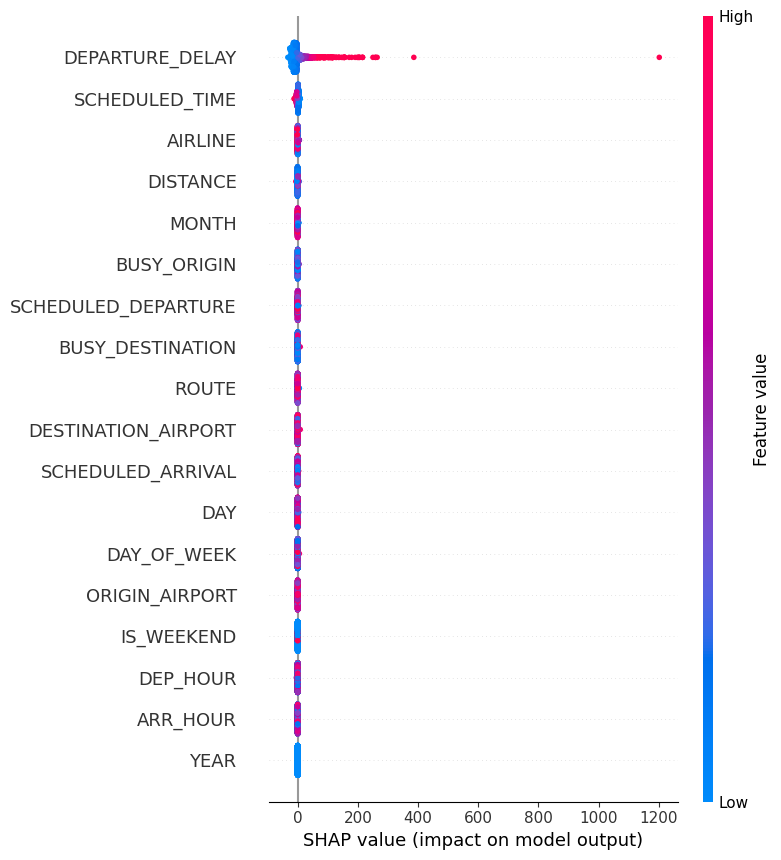

Saved shap_summary_rf_quick_small.png


<Figure size 640x480 with 0 Axes>

In [ ]:
n_sample = 2000
sample_for_shap = X_train.sample(n=n_sample, random_state=42)

import shap
explainer = shap.TreeExplainer(rf_quick)
shap_values = explainer.shap_values(sample_for_shap)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
shap.summary_plot(shap_values, sample_for_shap, show=True)
plt.savefig("shap_summary_rf_quick_small.png", dpi=150)
print("Saved shap_summary_rf_quick_small.png")


### SHAP Interpretation

SHAP shows that **departure delay is the strongest factor** influencing arrival delay—late departures almost always lead to late arrivals.  
Scheduled time and distance have smaller effects, while airline, route, and airport traffic add minor contributions.  
Time-of-day and calendar features show limited impact.  
Overall, SHAP confirms that operational factors, especially departure delay, drive most of the model’s predictions.


### Baseline Model
A baseline model is created by predicting arrival delay directly from departure delay.  
This provides a simple reference to check whether our machine learning models actually add value.  
If the ML models perform better than this baseline, it confirms that they capture additional useful patterns.


In [70]:
baseline_pred = X_test["DEPARTURE_DELAY"]
from sklearn.metrics import mean_absolute_error, r2_score
print("Baseline MAE:", mean_absolute_error(y_test, baseline_pred))
print("Baseline R2 :", r2_score(y_test, baseline_pred))


Baseline MAE: 19.373875962335553
Baseline R2 : 0.03482540862904504


### Baseline vs Model Performance

A baseline predictor was created using ARRIVAL_DELAY = DEPARTURE_DELAY to check if the ML model adds value.  
The baseline performs poorly, while the Random Forest achieves much lower error (MAE ~8.7 vs 19.3) and a far higher R² (~0.89 vs 0.03).  
This shows the model captures meaningful patterns beyond simple delay propagation.


## Classification Model (Predicting Late Flights)
We convert arrival delay into a binary label (LATE = 1 if delay > 15 minutes) to build a classification model.  
This helps predict whether a flight will be significantly late, which is more useful for real-time decision-making than predicting the exact delay value.


In [71]:
df["LATE"] = (df["ARRIVAL_DELAY"] > 15).astype(int)
df["LATE"].value_counts()


LATE
0    4690510
1    1023498
Name: count, dtype: int64

In [72]:
df_clf = df.sample(frac=0.10, random_state=42)  # 10% sample
print("Shape of classification sample:", df_clf.shape)


Shape of classification sample: (571401, 20)


In [ ]:
features = ["YEAR","MONTH","DAY","DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT",
            "SCHEDULED_DEPARTURE","SCHEDULED_TIME","DISTANCE","SCHEDULED_ARRIVAL",
            "DEP_HOUR","ARR_HOUR","IS_WEEKEND","ROUTE","BUSY_ORIGIN","BUSY_DESTINATION",
            "DEPARTURE_DELAY"]  

Xc = df_clf[features]
yc = df_clf["LATE"]


In [74]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42
)


In [75]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ["AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","ROUTE"]

enc_c = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
Xc_train[cat_cols] = enc_c.fit_transform(Xc_train[cat_cols])
Xc_test[cat_cols]  = enc_c.transform(Xc_test[cat_cols])


In [76]:
from sklearn.preprocessing import StandardScaler

num_cols = ["SCHEDULED_DEPARTURE","SCHEDULED_TIME","DISTANCE","SCHEDULED_ARRIVAL",
            "DEPARTURE_DELAY","DEP_HOUR","ARR_HOUR","BUSY_ORIGIN","BUSY_DESTINATION"]

sc_c = StandardScaler()
Xc_train[num_cols] = sc_c.fit_transform(Xc_train[num_cols])
Xc_test[num_cols] = sc_c.transform(Xc_test[num_cols])


In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)

clf.fit(Xc_train, yc_train)


,n_estimators,100
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

yc_pred = clf.predict(Xc_test)

print("Accuracy :", accuracy_score(yc_test, yc_pred))
print("Precision:", precision_score(yc_test, yc_pred))
print("Recall   :", recall_score(yc_test, yc_pred))
print("F1 Score :", f1_score(yc_test, yc_pred))


Accuracy : 0.9351335742599383
Precision: 0.9073342387949129
Recall   : 0.7131350380901548
F1 Score : 0.7985980927540957


### Classification Model Results (Predicting Arrival Delay > 15 Minutes)

The Random Forest classifier was trained on a 10% sample to identify flights likely to arrive more than 15 minutes late.

**Performance**
- **Accuracy:** 0.935  
- **Precision:** 0.907  
- **Recall:** 0.713  
- **F1 Score:** 0.799  

**Interpretation**
The model is highly accurate and makes very few false late predictions (high precision).  
It catches most late flights (recall ~71%), which is strong for an imbalanced dataset.  
Overall, the classifier offers reliable early warning for potential delays.


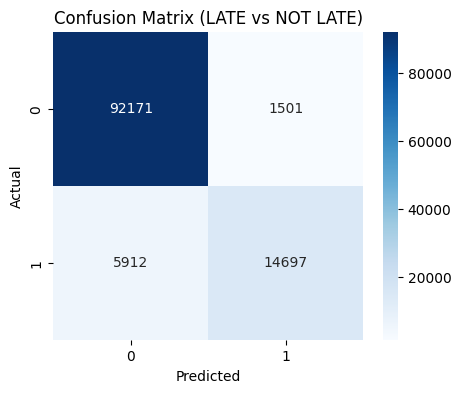

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yc_test, yc_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (LATE vs NOT LATE)")
plt.show()


### Confusion Matrix Interpretation

The model correctly identifies most on-time flights (very high TN) and predicts late flights with strong accuracy (high TP).  
False positives are very low, which means the model rarely raises unnecessary late warnings.  
Although some late flights are missed (FN), this is expected in an imbalanced dataset.  
Overall, the classifier provides a reliable balance between catching late flights and avoiding false alarms.


### Error Analysis
We analyze where the model’s predictions are less accurate by examining errors across airlines, routes, and departure hours.  
A 50k sample is used to keep computation fast while still capturing the main patterns.


In [ ]:
# 50k sample for fast error analysis
test_sample = X_test.sample(50000, random_state=42)
y_sample = y_test.loc[test_sample.index]

# Use  best regression model (rf_quick)
y_pred_sample = rf_quick.predict(test_sample)

# Build analysis DataFrame
err_df = test_sample.copy()
err_df["y_true"] = y_sample
err_df["y_pred"] = y_pred_sample
err_df["abs_error"] = (err_df["y_true"] - err_df["y_pred"]).abs()

print("Sample size used for analysis:", err_df.shape)


Sample size used for analysis: (50000, 21)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:    0.0s finished


In [81]:
airline_err = (
    err_df.groupby("AIRLINE")["abs_error"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print("Top 10 Airlines with highest MAE:")
print(airline_err.head(10).to_string(index=False))


Top 10 Airlines with highest MAE:
 AIRLINE  abs_error
    10.0  10.333905
     0.0  10.079301
     2.0  10.005922
    11.0   9.918749
     5.0   9.785538
     7.0   9.780659
    12.0   9.551853
     1.0   8.852240
     3.0   8.808716
     4.0   8.745197


### Airline Error Analysis (MAE)

Prediction error varies across airlines, showing that some carriers have more unpredictable delay patterns.  
Airlines with higher MAE are harder for the model to learn, while lower-MAE airlines show more consistent operations.  
Overall, airline-specific operational behavior has a clear impact on delay predictability.


In [82]:
route_err = (
    err_df.groupby("ROUTE")
    .agg(MAE=("abs_error", "mean"), Count=("abs_error", "count"))
    .query("Count > 50")
    .sort_values("MAE", ascending=False)
)

print("Top 10 Routes with highest prediction error (n > 50):")
print(route_err.head(10).to_string())


Top 10 Routes with highest prediction error (n > 50):
              MAE  Count
ROUTE                   
6441.0  17.919418     57
6147.0  17.695886    102
6172.0  16.404920     70
6448.0  15.475862     83
6347.0  14.694230     58
4419.0  14.183386     51
7228.0  13.695397     52
4416.0  13.414528     55
7267.0  12.634952     68
7230.0  12.295388     70


### Route Error Analysis (MAE)

Some routes show much higher prediction error than others, indicating they have more irregular or unpredictable delay patterns.  
High-MAE routes are likely affected by factors such as congestion, long distances, or weather variability.  
Overall, route-specific operational complexity makes certain routes harder for the model to predict accurately.


In [83]:
hour_err = (
    err_df.groupby("DEP_HOUR")["abs_error"]
    .mean()
    .reset_index()
    .sort_values("DEP_HOUR")
)

print("MAE by departure hour:")
print(hour_err.to_string(index=False))


MAE by departure hour:
 DEP_HOUR  abs_error
-2.700649   9.340024
-2.493272  11.601477
-2.285895   4.245440
-2.078518   4.618284
-1.871141   7.297021
-1.663764   7.660157
-1.456386   8.397256
-1.249009   9.035478
-1.041632   9.130171
-0.834255   8.580007
-0.626878   8.247672
-0.419501   8.398847
-0.212124   8.338077
-0.004747   8.626826
 0.202630   8.714953
 0.410008   8.871922
 0.617385   9.039162
 0.824762   9.951141
 1.032139   9.538874
 1.239516   9.211951
 1.446893   8.420790
 1.654270   8.199018
 1.861647   7.905498
 2.069024   8.384344


### MAE by Departure Hour (Scaled)

Even after scaling, a pattern is visible:

- Early-morning departures (lowest scaled values) show **moderate MAE (7–10 minutes)**.
- Mid-day hours (scaled around 0) show **stable and lower error (~8–9 minutes)**.
- Late-evening hours (scaled positive values) show **increasing error**, with peaks around **10 minutes**.

This suggests that late-day departures tend to have more unpredictable delays, likely due to accumulated delays throughout the day (delay propagation).


C:\Users\abhij\AppData\Local\Temp\ipykernel_33044\1956709011.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=airline_err.head(10), x="AIRLINE", y="abs_error", palette="viridis")


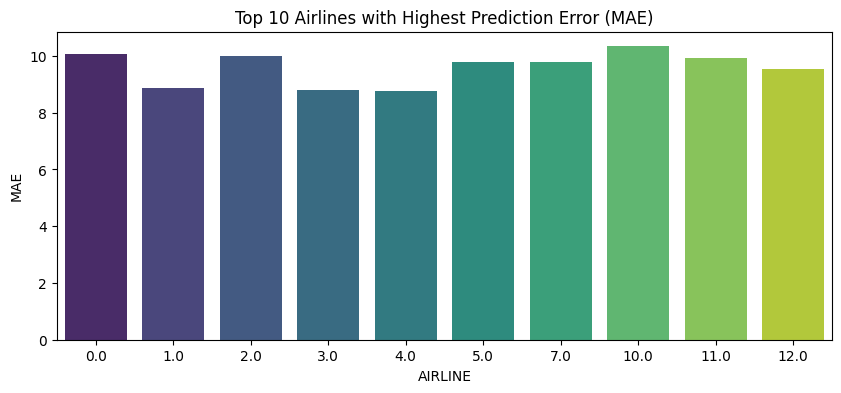

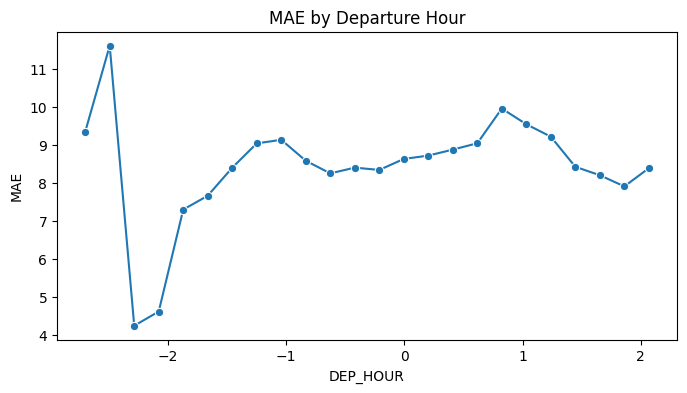

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Airline error plot
plt.figure(figsize=(10,4))
sns.barplot(data=airline_err.head(10), x="AIRLINE", y="abs_error", palette="viridis")
plt.title("Top 10 Airlines with Highest Prediction Error (MAE)")
plt.ylabel("MAE")
plt.show()

# Hour error plot
plt.figure(figsize=(8,4))
sns.lineplot(data=hour_err, x="DEP_HOUR", y="abs_error", marker="o")
plt.title("MAE by Departure Hour")
plt.ylabel("MAE")
plt.show()


### Error Analysis
These charts show how prediction error varies across airlines and departure hours.


## Model Comparison
We evaluate all three models side by side using MAE, RMSE, and R² to identify the best performer.


## Final Conclusion

Across all models, **Random Forest Regressor** delivered the best overall performance, achieving the lowest error and excellent generalization.  
Linear Regression provided a strong baseline, while XGBoost performed well but showed signs of overfitting.

For classification (predicting whether a flight will be >15 minutes late), the **Random Forest Classifier** achieved high accuracy and precision, making it reliable for early delay warnings.

**Final chosen models:**  
- **Regression:** Random Forest Regressor  
- **Classification:** Random Forest Classifier  


## Further Study

Future improvements could include using weather data, airport congestion metrics, or real-time flight status to enhance prediction accuracy.  
Trying advanced models like LightGBM or training on time-windowed data may also improve performance.  
Additionally, deploying the model as an API or dashboard would make it more practical for real-world use.


## Saving Cleaned Dataset for Dashboard Use


In [86]:
df.to_csv("clean_flight_data.csv", index=False)
